# Cleaning and analyzing employee exit surveys

We will investigate the exit surveys of employees from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institutes in Queensland, Australia. The datasets can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). The datasets have been altered to `UTF-8` encoding from the original `cp1252` encoding.

The aim of the project is to clean the data and then analyze it to discover:
- Are employee who only work at the institutes for a short while quitting due to some work place problem? Does these findings hold for long-term employees as well?
- Are there any particular reasons why younger employees are quitting? What about older employees?

There is no data dictionary provided with the original datasets. We will use our general understanding to define the meaning of the columns.  

Some of the columns from `dete_survey.csv`:
- `ID`: An ID that identifies a participant of the survey
- `SeparationType`: The reason a person's employment came to an end
- `Cease Date`: The year or month of employment termination
- `DETE Start Date`: The year a person became employed by DETE

Some of the columns from `tafe_survey.csv`:
- `Record ID`: An ID that identifies a participant of the survey
- `Reason for ceasing employment`: The reason a person's employment came to an end
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of employment in years

## 1. Exploring and cleaning the data

In [1339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime as dt

%matplotlib inline
pd.options.display.max_seq_items = 150
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated',
                           encoding = 'cp1252')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding = 'cp1252')

When reading in the data set we set the `na_values` parameter to 'Not Stated' to change values in the `DETE Start Date` and `Role Start Date` columns in `dete_survey`. These values were meant to be null-values, but were not represented as such.

### 1.1 Dropping columns from the data sets

In [1340]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [1341]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [1342]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [1343]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We will remove columns 28-48 from `dete_survey` and columns 17-65 from `tafe_survey`. We won't be needing those columns for this project. We only need the information about the age of the employee, their employment time, and the reasons for quitting/termination.

In [1344]:
#dropping the columns mentioned above
columms_dete = dete_survey.columns[28:49]
columns_tafe = tafe_survey.columns[17:66]

dete_survey_updated = dete_survey.drop(labels=columms_dete, axis=1)
tafe_survey_updated = tafe_survey.drop(labels=columns_tafe, axis=1)

In [1345]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

### 1.2 Standardizing column names across the data sets

The two data sets contain several columns that contain the same information for the two institutes, but they are named differently. We will standardize the naming so that they can be combined and compared.

Below is a table showing some of the columns we want to work with:

| dete_survey | tafe_survey | Definition |
| --- | --- | --- |
| ID | Record ID | ID used to identify participants of survey |
| SeparationType | Reason for ceasing employment | Reason why employment ended |
| Cease Date | CESSATION YEAR | The year/month the employment ended |
| DETE Start Date |  | The year employment began with DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | Length of employment in years |
| Age | CurrentAge. Current Age | Age of survey participant |
| Gender | Gender. What is your Gender? | Gender of survey participant |

We will start by cleaning the column names of `dete_survey_updated` and then clean `tafe_survey_updated`. We will change the names to 'snake_case' as is the python standard.

In [1346]:
#cleaning dete_survey_updated
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/', '_').str.replace('separationtype', 'separation_type')

dete_survey_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [1347]:
#cleaning tafe_survey_updated
new_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separation_type', tafe_survey_updated.columns[17]: 'gender',
             tafe_survey_updated.columns[18]: 'age',
             tafe_survey_updated.columns[19]: 'employment_status',
             tafe_survey_updated.columns[20]: 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(new_names, axis='columns', inplace=True)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Some of the columns in `tafe_survey_updated` are left unaltered for now.

### 1.3 Selecting rows that have the `Resignation` separation type 

In this analysis we are investigation whether employees that are quitting are doing so due to some dissatisfaction. For this reason we are only concerning ourselves with survey respondents who have the `Resignation` separation type.

In [1348]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [1349]:
display(tafe_survey_updated['separation_type'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

We will select `Resignation-Other reasons`, `Resignation-Other employer`, and `Resignation-Move overseas/interstate` values from the DETE data set.
From the TAFE data set we will select the rows with the value `Resignation`.

In [1350]:
dete_resignations = dete_survey_updated[
    dete_survey_updated["separation_type"].str.contains("Resignation")
].copy()
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated["separation_type"] == "Resignation"
].copy()

display(dete_resignations["separation_type"].value_counts())
print('')
display(tafe_resignations["separation_type"].value_counts())



Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

Resignation    340
Name: separation_type, dtype: int64

### 1.4 Checking the data for inconsistencies

Before continuing we will check that the data we have makes sense and is not corrupted.
We will verify that the values in the `cease_date` and `dete_start_date` columns are reasonable.
- We will check that the `cease_date` is after the starting date.
- We will check that the start of employment year is within reason. We will set the cut-off as 1940.

In [1351]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [1352]:
# extracting only the year from the dates
pattern = r"(20[0-1][0-6])"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pattern)
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float64")
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)



2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [1353]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

We can see that the values in `dete_start_date` and `cease_date` match each other.

In [1354]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [1355]:
tafe_resignations["institute_service"].value_counts().sort_index(ascending=True)

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

### 1.5 Creating matching length-of-employment columns in both data sets

The TAFE dataset has a `institue_service` column that holds the information about length of employment. We will create a column with the same name in the DETE dataset and calculate its values using the `dete_start_date` and `cease_date` columns

In [1356]:
dete_resignations["institute_service"] = (
    dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
)

dete_resignations["institute_service"].value_counts().sort_index(ascending=True)



0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### 1.6 Selecting and preparing columns to be used as markers of a dissatisfied employee

In order to categorize an employee as dissatisfied we will use the columns listed below. If an employee gave any of these reasons for quitting, we will categorize them as dissatisfied.

From tafe_survey_updated:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`
- `Contributing Factors. Interpersonal Conflict`

From dete_survey_updated:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `interpersonal_conflicts`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`


We start with the TAFE dataframe

In [1357]:
# checking the values of the TAFE dataframe
display(
    tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(
        dropna=False
    )
)
print('')
display(
    tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(
        dropna=False
    )
)
print('')
display(
    tafe_resignations["Contributing Factors. Interpersonal Conflict"].value_counts(
        dropna=False
    )
)



-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

-                         308
Interpersonal Conflict     24
NaN                         8
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

Next, we apply a function across the relevant columns and assign the result to a new column: `dissatisfied`. If any of the elements across the columns is marked as `NaN` or `-` it will return `False` to the new column, else it will return `True`.

In other words, if the employee has checked of any of the relevant columns we will label that employee as dissatisfied (`True` value).

In [1358]:
 #function to determine True or False
 def update_vals(element):
     if pd.isnull(element) == True:
         return np.nan
     elif element == '-':
         return False
     else:
         return True

#applying the function across relevant columns
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict']].applymap(update_vals).any(axis=1, skipna=False)

#creating a copy of the dataframe to avoid the SettingWithCopy problem
tafe_resignations_up = tafe_resignations.copy()

#checking the values of the new column
display(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))

False    235
True     105
Name: dissatisfied, dtype: int64

Next, we deal with the DETE dataframe

In [1359]:
#checking the values of the DETE dataframe
display(dete_resignations['job_dissatisfaction'].value_counts(dropna=False))
display(dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna=False))
display(dete_resignations['physical_work_environment'].value_counts(dropna=False))
display(dete_resignations['lack_of_recognition'].value_counts(dropna=False))
display(dete_resignations['lack_of_job_security'].value_counts(dropna=False))
display(dete_resignations['interpersonal_conflicts'].value_counts(dropna=False))
display(dete_resignations['work_location'].value_counts(dropna=False))
display(dete_resignations['employment_conditions'].value_counts(dropna=False))
display(dete_resignations['work_life_balance'].value_counts(dropna=False))
display(dete_resignations['workload'].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

False    305
True       6
Name: physical_work_environment, dtype: int64

False    278
True      33
Name: lack_of_recognition, dtype: int64

False    297
True      14
Name: lack_of_job_security, dtype: int64

False    291
True      20
Name: interpersonal_conflicts, dtype: int64

False    293
True      18
Name: work_location, dtype: int64

False    288
True      23
Name: employment_conditions, dtype: int64

False    243
True      68
Name: work_life_balance, dtype: int64

False    284
True      27
Name: workload, dtype: int64

From the values above we can see that there is no need to apply the `update_vals` function on the DETE dataframe. We will directly apply `.any()` to the relevant columns instead. This method returns `True` if any of columns has been checked by the employee.

In [1360]:
# applying the .any() method across relevant columns
columns = [
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "interpersonal_conflicts",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload",
]
dete_resignations["dissatisfied"] = dete_resignations[columns].any(axis=1, skipna=False)

# creating a copy of the dataframe to avoid the SettingWithCopy problem
dete_resignations_up = dete_resignations.copy()

# checking the values of the new column
display(dete_resignations_up["dissatisfied"].value_counts(dropna=False))



False    157
True     154
Name: dissatisfied, dtype: int64

### 1.7 Combining the datasets

Now we will combine the datasets. Our goal is to aggregate our data according to the employees employment time, which is collected in the `institute_service` columns.

In [1361]:
# new column to track which dataset the value in the new dataset came from
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

display(dete_resignations_up["institute"].value_counts())
display(tafe_resignations_up["institute"].value_counts())



DETE    311
Name: institute, dtype: int64

TAFE    340
Name: institute, dtype: int64

In [1362]:
# combining the dataframes
combined = pd.concat(
    [dete_resignations_up, tafe_resignations_up], ignore_index="True"
)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    int64  
 1   separation_type                                      651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

There are columns in the merged dataframe that we don't need for our analysis. We will drop any columns that has less than 500 non-null values.

In [1363]:
#checking non-null values
combined.notna().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study_travel                                           311
relocation                                             3

In [1364]:
#dropping columns
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    int64  
 1   separation_type    651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 46.5+ KB


We want to aggregate the data based on the `institute_service` column. Therefore, let us examine this column closer.

In [1365]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


We can see that the column contains values in several different forms. Year ranges in string format (`11-20`), string descriptions (`Less than 1 year`), and float values (i.e. `5.0`).  
To analyse this data we will convert all the values into categories. We will base the categories on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) that argues that employee's needs are better understood according to career stage instead of age.

We will use the following categories:
- `New`: Less than 3 years at the company
- `Experienced`: 3-6 years at the company
- `Established`: 7-10 years at the company
- `Veteran`: 11 or more years at the company

In [1366]:
# converting to string-type
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype(
    "str"
)

# extract all characters that is a year
combined_updated["institute_service_up"] = combined_updated[
    "institute_service_up"
].str.extract(r"(\d+)")

# converting the extracted values to float-type
combined_updated["institute_service_up"] = combined_updated[
    "institute_service_up"
].astype("float")

combined_updated["institute_service_up"].value_counts(dropna=False)



1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
22.0      6
14.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
30.0      2
26.0      2
36.0      2
29.0      1
34.0      1
27.0      1
42.0      1
35.0      1
41.0      1
49.0      1
33.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [1367]:
#function to sort age according to categories
def stage(num):
    if pd.isnull(num):
        return np.nan
    elif num < 3:
        return 'New'
    elif num < 7:
        return 'Experienced'
    elif num < 11:
        return 'Established'
    return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(stage)

combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## 2. Analysis of the final data

We will replace the missing values above with the values that occur most frequently in the column, which is `False`.

In [1368]:
combined_updated.fillna(0, inplace=True)
combined_updated["dissatisfied"] = (
    combined_updated["dissatisfied"].astype("bool")
)

combined_updated["dissatisfied"].value_counts(dropna=False)


False    392
True     259
Name: dissatisfied, dtype: int64

In [1369]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value =  False)

### Dissatisfaction by length of employment

We will use a pivot table to calculate the percentage of dissatisfied employees per category.

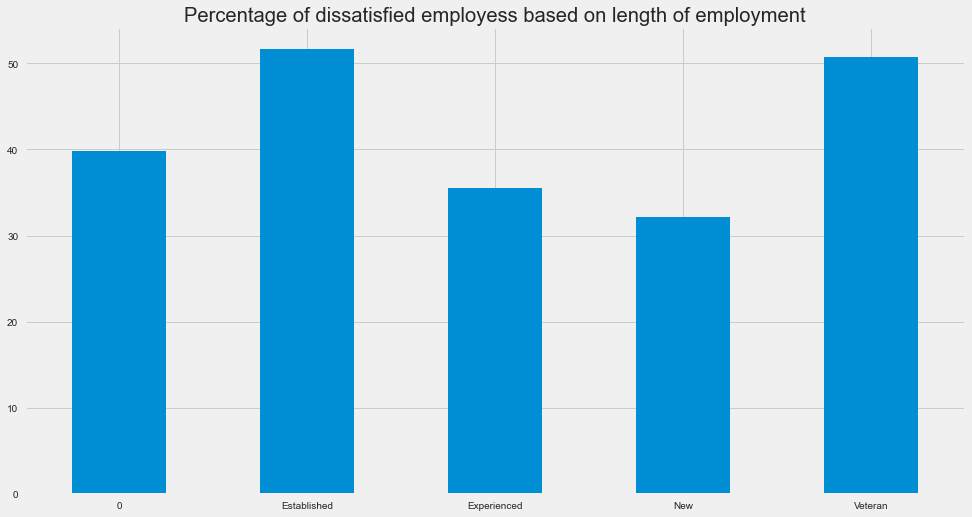

In [1370]:
dissatisfied_pct = (
    combined_updated.pivot_table(index="service_cat", values="dissatisfied") * 100
)

#plt.style.use("seaborn")
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
dissatisfied_pct.plot(kind="bar", rot = 0, ax=ax)
fig.set_size_inches(15, 8)
ax.set_xlabel("")
ax.set_title(
    "Percentage of dissatisfied employess based on length of employment"
)
ax.legend("")

plt.show()

### Dissatisfaction by contract type

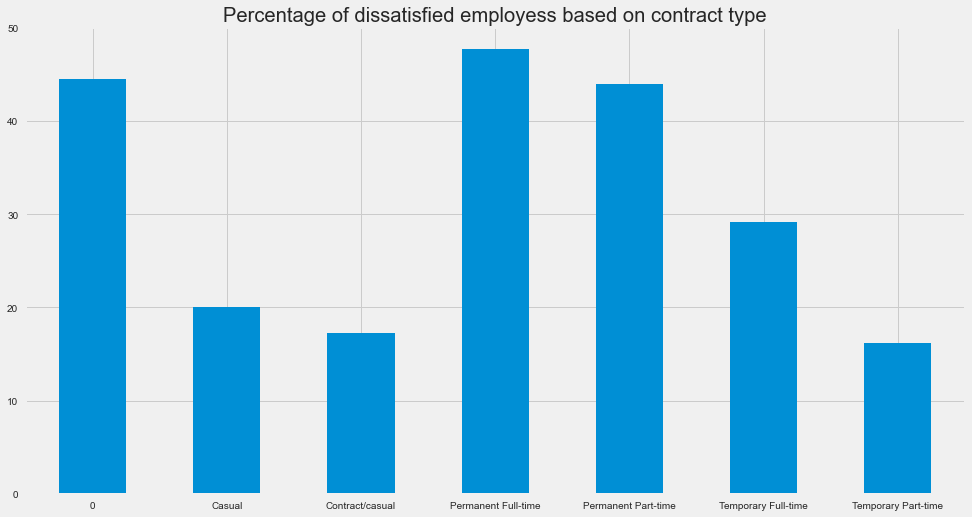

In [1371]:
dissatisfied_contract_pct = (
    combined_updated.pivot_table(index="employment_status", values="dissatisfied") * 100
)

fig, ax = plt.subplots()
dissatisfied_contract_pct.plot(kind="bar", rot = 0, ax=ax)
fig.set_size_inches(15, 8)
ax.set_xlabel("")
ax.set_title(
    "Percentage of dissatisfied employess based on contract type"
)
ax.legend("")

plt.show()

### Dissatisfaction by employee age

In [1372]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
0                55
41-45            48
41 – 45          45
46-50            42
36-40            41
46 – 50          39
26-30            35
21 – 25          33
36 – 40          32
31 – 35          32
26 – 30          32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [1373]:
# Combining some of the age categories above
combined_updated['age'] = (
    combined_updated['age'].str.replace(' ','').str.replace('–','-').str.replace('56orolder','56 or older').str.replace('56-60', '56 or older').str.replace('61orolder', '56 or older').str.replace('20oryounger', '20 or younger')
)
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age, dtype: int64

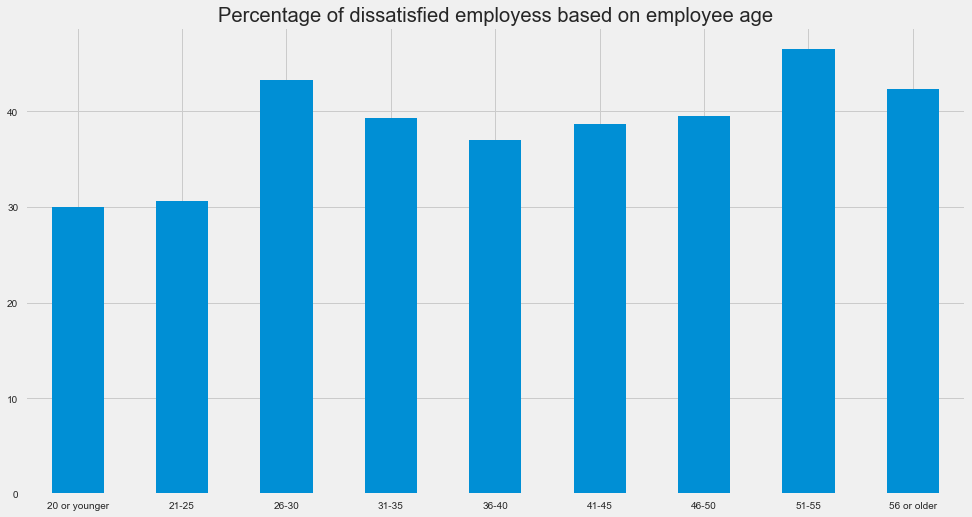

In [1374]:
dissatisfied_age_pct = (
    combined_updated.pivot_table(index="age", values="dissatisfied") * 100
)

fig, ax = plt.subplots()
dissatisfied_age_pct.plot(kind="bar", rot = 0, ax=ax)
fig.set_size_inches(15, 8)
ax.set_xlabel("")
ax.set_title(
    "Percentage of dissatisfied employess based on employee age"
)
ax.legend("")

plt.show()

# Conclusion
From the data collected above we can make several conclusions:
- Employees that have been with the institutes for more than 7 years are more likely to resign due dissatisfaction.
- Employees who have a permanent position are more likely to resign due to dissatisfaction
- Employees above 25 years old don't differ to much in their levels of dissatisfaction. Though, there are spikes at `26-30`, `51-55` and `56 or older`.